# Parte 2

# Bases: mudando o referencial

Este capítulo está ligado ao seguintes objetivos didáticos do curos:
1. Avaliar e resolver sistemas de equações lineares
1. Interpretar e analisar transformações lineares

Referência bibliográfica: [Jim Hefferon - Linear Algebra - 4th Edition](https://hefferon.net/linearalgebra/) - Chap. Three, V-VI

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1
**Objetivo: realizar uma combinação linear de vetores**

Numa loja, vendem-se pacotes do tipo P1 e do tipo P2. O pacote P1 tem 3 brigadeiros e 2 coxinhas. O pacote P2 tem 3 coxinhas e 1 brigadeiro. Gostaríamos de comprar 9 brigadeiros e 13 coxinhas. 

1. Quantos pacotes do tipo P1 e do tipo P2 deveríamos comprar?
2. No plano cartesiano (brigadeiros x coxinhas), que vetor representa nossa compra?
3. No plano cartesiano (P1 x P2), que vetor representa nossa compra?
4. Qual é a matriz que permite converter uma compra escrita como "brigadeiros e coxinhas" para uma compra escrita como "P1 e P2"?

**Solução**

Neste exercício, sabemos que comprar um pacote P1 é equivalente a comprar 3 brigadeiros e 2 coxinhas, e comprar um pacote P2 é equivalente a comrpar 3 coxinhas e 1 brigadeiro. Vou começar essa solução *discutindo um erro comum* que é dizer que:

$$
\begin{cases}
\begin{array}{rl}
P_1 &= 3b + 2c\\
P_2 &= 1b + 3c
\end{array}
\end{cases}
$$

O que esse sistema (que está errado), estamos dizendo que o número de pacotes P1 é igual a 3 vezes número de brigadeiros mais 2 vezes o número de coxinhas! O equacionamento correto é dizer que o número de coxinhas é igual a 2 vezes o número de pacotes P1 mais três vezes no número de pacotes P2, e seguimos um raciocínio análogo para o número de brigadeiros:

$$
\begin{cases}
\begin{array}{rl}
b &= 3P_1 + 1P_2\\
c &= 2P_1 + 3P_2
\end{array}
\end{cases}
$$

Na forma matricial, ficamos com:


$$
\begin{bmatrix}b \\ c\end{bmatrix} = 
\begin{bmatrix}3 & 1 \\ 2 & 3 \end{bmatrix}
\begin{bmatrix}P_1 \\ P_2\end{bmatrix}
$$

E podemos resolver nosso problema normalmente!

In [4]:
A = np.array([[3, 1], [2, 3]])
A_inv = np.linalg.inv(A)
bc = np.array( [[9,13]]).T
p = A_inv @ bc

print(f"Número de pacotes P1:{p[0,0]}")
print(f"Número de pacotes P2:{p[1,0]}")
print(f"Vetor em brigadeiros-coxinhas: {bc.T}")
print(f"Vetor em pacotes: {p.T}")
print(f"Matriz de transformação: {A_inv}")

Número de pacotes P1:1.9999999999999996
Número de pacotes P2:3.0
Vetor em brigadeiros-coxinhas: [[ 9 13]]
Vetor em pacotes: [[2. 3.]]
Matriz de transformação: [[ 0.42857143 -0.14285714]
 [-0.28571429  0.42857143]]


# Exercício 2
**Objetivo: modelar uma combinação linear**

Em um plano cartesiano, estamos inicialmente na origem e gostaríamos de nos mover para o vetor $v=[5, -3]$. Porém, só podemos nos movimentar ao longo dos vetores $w_1 = [-1, 1]$ e $w_2 = [3, -2]$.

Encontre quanto devemos andar nas direções $w_1$ e $w_2$ para chegar ao ponto $[5, -3]$, isto é, quais são os valores de $a_1$ e $a_2$ tais que $a_1 w_1 + a_2 w_2 = [5, -3]$.



**Solução**

Podemos modelar nosso problema como:
$$
\begin{bmatrix}5 \\ -3 \end{bmatrix} =
a_1 \begin{bmatrix} -1 \\ 1 \end{bmatrix} + a_2 \begin{bmatrix} 3 \\ -2 \end{bmatrix}
$$ 

Colocando na forma matricial:

$$
\begin{bmatrix}5 \\ -3 \end{bmatrix} = \begin{bmatrix} -1 & 3 \\ 1 & -2 \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}
$$

E, portanto,
$$
\begin{bmatrix} a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} -1 & 3 \\ 1 & -2 \end{bmatrix} ^{-1} \begin{bmatrix}5 \\ -3 \end{bmatrix}
$$

In [5]:
w = np.array([ [-1, 3], [1, -2]])
y = np.array( [[5, -3]]).T
a = np.linalg.inv(w) @ y
print(f"Valor de a1: {a[0,0]}")
print(f"Valor de a2: {a[1,0]}")

Valor de a1: 1.0
Valor de a2: 2.0


# Exercício 3
**Objetivo: generalizar o resultado de uma combinação linear**

No exercício anterior, mapeamos um vetor $[5,-3]$ para um vetor $[a_1, a_2]$.

1. Generalize sua solução para encontrar como chegar em um ponto genérico $v=[x,y]$.
2. Modifique o código abaixo para que ele mostre como cada vetor $[x,y]$ é mapeado para um vetor $[a_1, a_2]$

**Solução** 

$$
\begin{bmatrix}x \\ y \end{bmatrix} =
a_1 \begin{bmatrix} -1 \\ 1 \end{bmatrix} + a_2 \begin{bmatrix} 3 \\ -2 \end{bmatrix}
$$ 

Colocando na forma matricial:

$$
\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix} -1 & 3 \\ 1 & -2 \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}
$$

E, portanto,
$$
\begin{bmatrix} a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} -1 & 3 \\ 1 & -2 \end{bmatrix} ^{-1} \begin{bmatrix}x \\ y \end{bmatrix}
$$

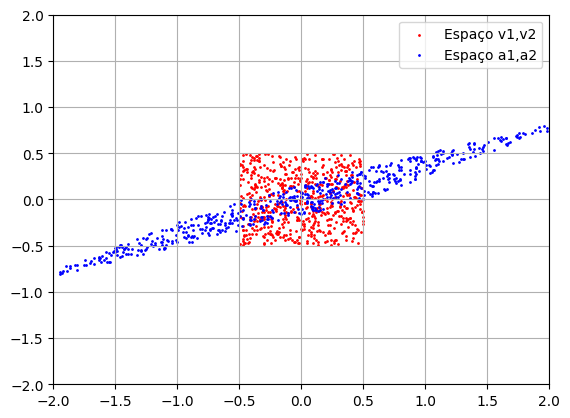

In [6]:
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))

# Altere daqui para baixo
# -----------------
w = np.array([ [-1, 3], [1, -2]])
v = np.linalg.inv(w) @ x
# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r', label='Espaço v1,v2')
plt.scatter(v[0,:], v[1,:], s=1, c='b', label='Espaço a1,a2')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.legend()
plt.show()

# Exercício 4
**Objetivo: aplicar o conceito de base para construir uma transformação**

No exercício anterior, tínhamos um vetor "original". Quanto temos um vetor "original", implicitamente ele está nos dizendo o quanto devemos "andar" na direção dos vetores que estão na matriz identidade. Por exemplo, o vetor $v=[2,3]$ pode ser entendido como:
$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
=
2
\begin{bmatrix}
 1 \\
 0
\end{bmatrix}

+ 

3
\begin{bmatrix}
 0 \\
 1
\end{bmatrix}
$$ 

Veja como essa soma de vetores pode ser representada graficamente:

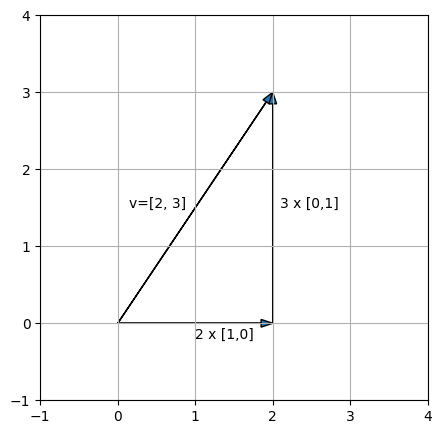

In [3]:
# Um vetor é, implicitamente, a definição de uma soma ponderada de vetores da base canônica:
v = np.array([2, 3])
plt.figure(figsize=(5,5))
plt.arrow(0,0,v[0],v[1],length_includes_head=True,head_width=0.1)
plt.arrow(0,0,v[0],0,length_includes_head=True,head_width=0.1)
plt.arrow(v[0],0,0,v[1],length_includes_head=True,head_width=0.1)
plt.text(v[0]/2 - 0.85, v[1]/2, 'v=['+str(v[0])+', '+str(v[1])+']')
plt.text(v[0] + 0.1, v[1]/2, '3 x [0,1]')
plt.text(v[0]/2, -0.2, '2 x [1,0]')
plt.xlim([-1,4])
plt.ylim([-1,4])
plt.grid()
plt.show()

Daí então, quando tentamos usar os vetores $w_1 = [-1, 1]$ e $w_2 = [3, -2]$ para compor nosso ponto, passamos a escrever:

$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
= a_1 w_1 + a_2 w_2 = 

a_1
\begin{bmatrix}
 -1 \\
 1
\end{bmatrix}

+ 

a_2
\begin{bmatrix}
 3 \\
 -2
\end{bmatrix}
$$ 

As duas representações (a original e a modificada) podem ser escritas como multiplicações matriciais:

$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
=

\begin{bmatrix}
 1 & 0\\
 0 & 1
\end{bmatrix}
\begin{bmatrix}
 2 \\
 3 
\end{bmatrix}

=

\begin{bmatrix}
 -1 & 3\\
 1 & -2
\end{bmatrix}
\begin{bmatrix}
 a_1 \\
 a_2 
\end{bmatrix}
$$

Agora, veja como passamos a entender o nosso vetor original ($[2,3]^T$) como uma multiplicação de dois elementos diferentes:

1. Uma matriz que contém os vetores que são usados como *base* para encontrar os pontos:

$$
B = 
\begin{bmatrix}
 -1 & 3\\
 1 & -2
\end{bmatrix}
=
\begin{bmatrix}
 w_1 & w_2 
\end{bmatrix}
$$

2. Um vetor que contém os coeficientes que devem multiplicar os vetores-base antes de somá-los, para então encontrar o ponto de referência.

$$
w=
\begin{bmatrix}
 a_1\\
 a_2 
\end{bmatrix}
$$

Por isso, dizemos que a vetor $w$ está na **base** $B$.

De forma mais geral, estamos dizendo que um vetor inicial $v$ pode ser escrito na base $B$ usando o vetor $w$ se:

$$
v = B w
$$

e, portanto, se conhecemos $v$ e $B$, então podemos encontrar $w$ resolvendo o sistema linear acima.

Por fim, dizemos que $v$ está na "base canônica" porque, implicitamente, os vetores-base de $v$ formam a matriz identidade, isto é:

$$
v = I v
$$

**Enunciado do exercício**

1. Se assumimos que a base de cores RGB é a base canônica, então um pixel em RGB pode ser escrito como um vetor $v$. Quais são os vetores-base que permitem transformar esse pixel para o espaço YIQ? Em outras palavras, quais são as colunas de $B$ tal que $X_{rgb} = B X_{yiq}$?
2. Se assumimos que a base de cores YIQ é a base canônica, então um pixel em YIQ pode ser escrito como um vetor $v$. Quais são os vetores-base que permitem transformar esse pixel para o espaço RGB? Em outras palavras, quais são as colunas de $C$ tal que $X_{yiq} = C X_{rgb}$?
3. Qual é a relação entre as matrizes $C$ e $B$ definidas acima?

**Solução**

1. $B = A^{-1}$, onde $A$ é a matriz que leva de RGB para YIQ (definida na parte 01)
2. Nesse caso, $C$ é exatamente a matriz $A$.
3. $B = C^{-1}$


# Exercício 5
*Objetivo: encontrar os vetores-base em uma rotação*

Quando realizamos uma rotação no plano $\mathbb{R}^2$, partimos de um vetor $x$ para encontrar um vetor $y$ usando a equação:

$$
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
$$

Vamos nos referir a $\mathbb{R}_x$ quando estivermos falando de um vetor na base canônica (na base de $x$), e $\mathbb{R}_y$ para nos referir a um vetor na base rotacionada (a base de $y$).

Os vetores $\begin{bmatrix}1\\0\end{bmatrix}$ e $\begin{bmatrix}0\\1\end{bmatrix}$ estão em $\mathbb{R}_y$. Encontre suas representações em $\mathbb{R}_x$. Dica: assuma um valor arbitrário para $\theta$ e use `numpy` para realizar as operações necessárias.


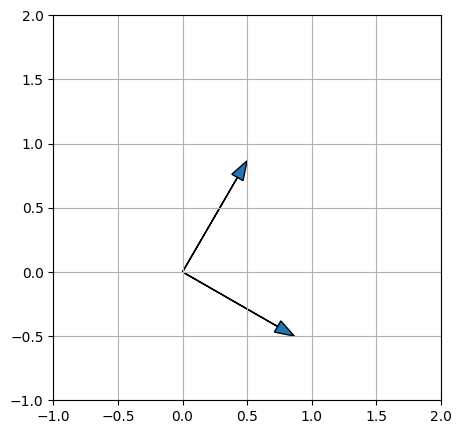

In [8]:
# Solucao
theta = np.deg2rad(30)
R = np.array( [ [np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)] ] )

v_ry = np.eye(2)
v_rx = np.linalg.inv(R) @ v_ry

plt.figure(figsize=(5,5))
plt.arrow(0,0,v_rx[0,0],v_rx[1,0],length_includes_head=True,head_width=0.1)
plt.arrow(0,0,v_rx[0,1],v_rx[1,1],length_includes_head=True,head_width=0.1)
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.grid()
plt.show()
